In [23]:
import pandas as pd
import os
from tqdm import tqdm

## Load dataset

In [24]:
import re

# remove special characters
special_chars_re = r'[^\w\s]'

In [25]:
re.sub(special_chars_re, '', "2022年8月22日贷款市场报价利率（LPR）,中国人民银行授权全国银行间同业拆借中心公布年月日贷款市场报价利率（）为")

'2022年8月22日贷款市场报价利率LPR中国人民银行授权全国银行间同业拆借中心公布年月日贷款市场报价利率为'

In [26]:
folder_path = "tmp/raw_text/ce_cn"
dataframes = []

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path)
            dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
ce_cn = pd.concat(dataframes, ignore_index=True).drop('scrape_date', axis=1).drop_duplicates(subset=['identifier'])

ce_cn['article_time'] = pd.to_datetime(ce_cn['article_time'], format='%Y年%m月%d日 %H:%M')
ce_cn['content'] = ce_cn['content'].apply(func= lambda x: re.sub(special_chars_re, '', str(x)))
ce_cn = ce_cn.sort_values(by='article_time').reset_index(drop=True)

In [27]:
ce_cn

,identifier,title,content,article_time,article_source
0,t20220615_37756408,正视疫情防控的复杂性和长期性,鉴于北京天堂超市酒吧引发聚集性疫情北京市有关部门依法对其立案调查这起聚集性疫情仍处于发展阶段...,2022-06-15 05:06:00,来源：中国经济网-《经济日报》
1,t20220615_37756422,北京对全市娱乐场所开展大检查,经济日报北京6月14日讯记者韩秉志14日举行的北京疫情防控工作新闻发布会通报为以最快速度阻断...,2022-06-15 05:08:00,来源：中国经济网-《经济日报》
2,t20220615_37756427,我国自主培养研究生成科创主力 10年间输送60多万名博士650多万名硕士,经济日报北京6月14日讯记者 李丹教育部14日召开教育这十年新闻发布会介绍研究生教育十年改革...,2022-06-15 05:11:00,来源：中国经济网-《经济日报》
3,t20220615_37756443,首批科创票落地 银行间债市创新支持“硬科技”,首批科创票据近期在银行间债市落地记者通过公开信息查询了解到其中无锡华光环保能源集团股份有限公...,2022-06-15 05:17:00,来源：中国经济网-《经济日报》
4,t20220615_37756445,一系列稳投资政策举措密集出台 各地重大项目建设热潮再起,新基建成经济复苏压舱石走进江苏省无锡市蠡园经济开发区的国家超级计算无锡中心神威太湖之光超级计...,2022-06-15 05:18:00,来源：中国经济网-《经济日报》
...,...,...,...,...,...
1720,t20230320_38451396,压实耕地保护责任,今年全国两会期间习近平总书记再次强调要严守耕地红线稳定粮食播种面积加强高标准农田建设切实保障...,2023-03-20 08:58:00,来源：中国经济网-《经济日报》
1721,t20230320_38451400,鼓励闲置交易助力碳减排,今年政府工作报告提出完善支持绿色发展的政策和金融工具发展循环经济推进资源节约集约利用作为循环...,2023-03-20 08:59:00,来源：中国经济网-《经济日报》
1722,t20230320_38451478,房地产业应顺应趋势加快转型,近期多地新房二手房市场呈现回暖迹象国家统计局数据显示2023年2月份70个大中城市中商品住宅...,2023-03-20 09:05:00,来源：中国经济网-《经济日报》
1723,t20230320_38451536,国台办：大陆方面欢迎马英九先生来访,马英九将于3月27日率团来大陆祭祖交流国台办发言人马晓光20日上午表示大陆方面欢迎马英九先生...,2023-03-20 09:16:00,来源：人民日报


In [28]:
folder_path = "tmp/raw_text/mrxwlb"
dataframes = []

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path, encoding='utf-8')
            dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
mrxwlb = pd.concat(dataframes, ignore_index=True)

xwlb_tmp = mrxwlb[~mrxwlb['content'].str.contains('Perhaps try sear')]
xwlb_tmp['date'] = pd.to_datetime(xwlb_tmp['date'])
xwlb_tmp = xwlb_tmp.sort_values(by='date').drop_duplicates().reset_index( drop=True)
xwlb_tmp.to_csv('xwlb_raw.csv', index=False)
xwlb_tmp['content'] = xwlb_tmp['content'].apply(func= lambda x: re.sub(special_chars_re, '', str(x)))

/tmp/ipykernel_22920/3973032843.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xwlb_tmp['date'] = pd.to_datetime(xwlb_tmp['date'])


## Word count model

In [29]:
import jieba
import jieba.analyse as jba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [30]:
text_data = "".join(xwlb_tmp['content'].to_list())

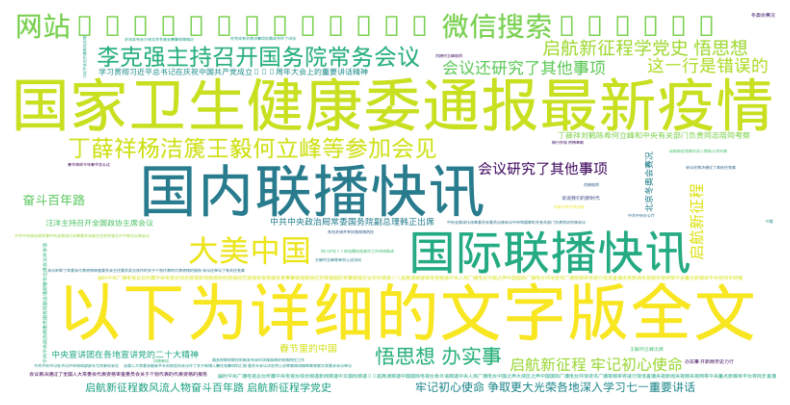

In [31]:
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='DroidSansFallback.ttf').generate(text_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
from collections import Counter


# remove stopwords
def get_stopword_list(file):
    with open(file, 'r', encoding='utf-8') as f:    # 
        stopword_list = [word.strip('\n') for word in f.readlines()]
    return stopword_list

def clean_stopword(str, stopword_path):
    stopword_list = get_stopword_list(stopword_path)
    result = ''
    word_list = jieba.lcut(str)   # 分词后返回一个列表  jieba.cut(）   返回的是一个迭代器
    for w in word_list:
        if w not in stopword_list:
            result += w
    return result


clean_text = clean_stopword(text_data.replace(" ", ''), 'baidu_stopwords.txt')

In [38]:
Counter(jieba.lcut(clean_text)).most_common()

[('日', 10477),
 ('发展', 9237),
 ('月', 9116),
 ('中国', 8261),
 ('新', 7082),
 ('习近平', 6991),
 ('国家', 6076),
 ('年', 4892),
 ('病例', 4549),
 ('工作', 4108),
 ('美国', 4056),
 ('建设', 3846),
 ('例', 3604),
 ('上', 3234),
 ('疫情', 3209),
 ('中', 3186),
 ('党', 3114),
 ('我国', 3097),
 ('总书记', 3065),
 ('确诊', 2923),
 ('国际', 2915),
 ('人民', 2884),
 ('全国', 2867),
 ('推动', 2864),
 ('合作', 2836),
 ('时代', 2746),
 ('经济', 2609),
 ('推进', 2607),
 ('新冠', 2578),
 ('主席', 2297),
 ('北京', 2285),
 ('全球', 2241),
 ('大', 2217),
 ('报告', 2208),
 ('7', 2156),
 ('时', 2134),
 ('累计', 2134),
 ('8', 2123),
 ('6', 2100),
 ('增长', 2055),
 ('地区', 2048),
 ('中国共产党', 1960),
 ('新增', 1956),
 ('指出', 1955),
 ('世界', 1919),
 ('企业', 1910),
 ('持续', 1885),
 ('社会主义', 1859),
 ('1', 1836),
 ('会议', 1806),
 ('5', 1793),
 ('超过', 1779),
 ('已', 1763),
 ('支持', 1701),
 ('10', 1695),
 ('健康', 1685),
 ('截至', 1683),
 ('总统', 1652),
 ('创新', 1641),
 ('中央', 1633),
 ('乌克兰', 1631),
 ('3', 1604),
 ('服务', 1581),
 ('4', 1572),
 ('代表', 1535),
 ('下', 1519),
 ('生态', 1517),
 ('好'

In [39]:
jba.extract_tags(xwlb_tmp['content'].to_list()[3])

['生态',
 '建设',
 '文明',
 '习近平',
 '病例',
 '海南',
 '新冠',
 '耗材',
 '中国',
 '美国',
 '病毒',
 '美丽',
 '今天',
 '推进',
 '白俄罗斯',
 '采购',
 '带量',
 '10',
 '自贸港',
 '全球']

In [40]:
import multiprocessing
import jieba
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
# from nltk.corpus import stopwords
# import nltk
from tools import *
# nltk.download('stopwords')


# load the news data
chinese_documents = ce_cn['content'].to_list()

In [41]:
# 使用ThreadPoolExecutor并行处理文本
with multiprocessing.Pool() as pool:
    processed_chinese_documents = pool.map(preprocess_chinese_text, chinese_documents)

In [42]:
# 使用TF-IDF向量化中文文本数据
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,4), max_df=0.85, max_features=1000)
tfidf_matrix = tfidf_vectorizer.fit_transform(chinese_documents)

# 使用K均值聚类进行文本分类
kmeans = KMeans(n_clusters=14, random_state=42)
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=14, random_state=42)

In [43]:
labeled_document = []
# 输出每个文档所属的类别
for i, label in enumerate(kmeans.labels_):
    # print(f"Document {chinese_documents[i]} belongs to Cluster {label}")
    labeled_document.append((chinese_documents[i], label))

In [44]:
tmp_df = pd.DataFrame(labeled_document, columns=['content', 'label'])

In [45]:
tmp_df.groupby('label').count()

,content
label,
0,12
1,1533
2,8
3,56
4,15
5,7
6,12
7,16
8,39


In [47]:
tmp_df[tmp_df.label == 0]

,content,label
31,近日国务院办公厅印发关于进一步推进省以下财政体制改革的指导意见以下简称意见对推进省以下财政体...,0
158,今年以来我国实施新的组合式税费支持政策帮助市场主体纾困解难作为其中的重头戏实施大规模增值税留...,0
248,作为今年新的组合式税费支持政策的重要内容实施大规模增值税留抵退税是助企纾困稳定宏观经济大盘的...,0
333,近日财政部政府和社会资本合作PPP中心发布半年报显示今年上半年PPP市场规模稳中有增新入库项...,0
350,近日中央政治局召开会议分析研究当前经济形势部署下半年经济工作会议强调宏观政策要在扩大需求上积...,0
398,今年我国部署实施新的组合式税费支持政策财政部近期对10个地区的工作情况开展调研调研结果及税务...,0
576,8月30日财政部发布2022年上半年中国财政政策执行情况报告在回顾上半年财政政策执行情况基础...,0
700,近日国务院常务会议部署依法用好5000多亿元专项债地方结存限额10月底前发行完毕今年以来专项...,0
757,国家税务总局最新统计显示截至8月31日全国累计新增减税降费及退税缓税缓费超33万亿元大规模增...,0
1123,近日财政部印发关于进一步推动政府和社会资本合作PPP规范发展阳光运行的通知从做好项目前期论证...,0
